# 🛠️ Project: "Retail Sales ETL Pipeline"
🎯 Goal:
Create a pipeline that extracts, cleans, and loads retail sales data into a SQL database for analysis.

## 1.Project Overview

Problem Statement:
A retail shop provides you with daily sales CSV files. You need to automate:

Loading the data

Cleaning it

Storing it in a database

Running simple analysis queries

## 2. Tech Stack

Python – For scripting

Pandas – For data cleaning

SQLite/PostgreSQL – As your data warehouse

Cron or Airflow (optional) – For scheduling

## 3. Input Files

Sample CSV: daily_sales.csv

Dataset link:

https://drive.google.com/file/d/1CvWoDIVlBgi1GW5aqEknbR54-EX7pKoS/view?usp=sharing

In [5]:
import warnings
warnings.filterwarnings("ignore")  #To ignore warnings in python.

In [6]:
import pandas as pd
import sqlite3

#Import libraries.

# 1.EXTRACT :

In [7]:
df = pd.read_csv("daily_sales.csv")
print(df.head())

         date  product_id product_name   category  price  quantity_sold
0  2023-01-01         101        Apple      Fruit   0.50             95
1  2023-01-01         102       Banana      Fruit   0.30            161
2  2023-01-01         103       Orange      Fruit   0.40            117
3  2023-01-01         104       Tomato  Vegetable   0.20            129
4  2023-01-01         105       Potato  Vegetable   0.25            116


In [8]:
df = df.dropna()
df

,date,product_id,product_name,category,price,quantity_sold
0,2023-01-01,101,Apple,Fruit,0.50,95
1,2023-01-01,102,Banana,Fruit,0.30,161
2,2023-01-01,103,Orange,Fruit,0.40,117
3,2023-01-01,104,Tomato,Vegetable,0.20,129
4,2023-01-01,105,Potato,Vegetable,0.25,116
...,...,...,...,...,...,...
295,2023-01-30,106,Carrot,Vegetable,0.30,189
296,2023-01-30,107,Milk,Dairy,1.00,57
297,2023-01-30,108,Cheese,Dairy,2.50,122
298,2023-01-30,109,Bread,Bakery,1.20,164


# 2.TRANSFORM

In [9]:
# Creating a new column.
df['total_sales'] = df['price'] * df['quantity_sold']

print(df.head())

         date  product_id product_name   category  price  quantity_sold  \
0  2023-01-01         101        Apple      Fruit   0.50             95   
1  2023-01-01         102       Banana      Fruit   0.30            161   
2  2023-01-01         103       Orange      Fruit   0.40            117   
3  2023-01-01         104       Tomato  Vegetable   0.20            129   
4  2023-01-01         105       Potato  Vegetable   0.25            116   

   total_sales  
0         47.5  
1         48.3  
2         46.8  
3         25.8  
4         29.0  


In [10]:
# Create connection (creates file 'retail_sales.db' in current folder)
conn = sqlite3.connect('retail_sales.db')

# Write dataframe to SQL table called 'sales'
df.to_sql('sales', conn, if_exists='replace', index=False)

# Close connection
conn.close()

Query and Analyze Data:

After storing your cleaned data in the SQLite database, we want to extract insights using SQL queries.

🎯 Purpose:

Check daily total sales

Find which products generate most revenue

See which category performs best

## 2.1 Connecting to DataBase and Create cursor :

In [11]:
conn = sqlite3.connect('retail_sales.db')  #We connect to the SQLite database file(retail_sales.db)
cursor = conn.cursor()    #create a cursor object, which acts like a pointer to execute SQL commands and fetch data.

#No printed output yet. Just establishes connection so we can run SQL.

### Total Sales per Day :

In [12]:
query = """
SELECT date, SUM(total_sales) as daily_sales   
FROM sales
GROUP BY date
ORDER BY date;
"""

result = cursor.execute(query).fetchall()
for row in result:  # Show first 5 rows
    print(row)
    
#SELECT date, SUM(total_sales) as daily_sales: select each date and calculate total sales value that day.
#FROM sales: use our sales table.
#GROUP BY date: group rows by each unique date.
#ORDER BY date: sort results in ascending order by date.

#.fetchall() gets all the rows from the result and returns them as a list of tuples.

('2023-01-01', 697.1999999999999)
('2023-01-02', 774.9)
('2023-01-03', 1025.75)
('2023-01-04', 742.4499999999999)
('2023-01-05', 701.9)
('2023-01-06', 777.3499999999999)
('2023-01-07', 1107.8)
('2023-01-08', 634.9000000000001)
('2023-01-09', 660.8)
('2023-01-10', 874.2)
('2023-01-11', 846.5)
('2023-01-12', 928.95)
('2023-01-13', 798.5)
('2023-01-14', 774.75)
('2023-01-15', 1077.1999999999998)
('2023-01-16', 1093.3)
('2023-01-17', 915.45)
('2023-01-18', 891.0)
('2023-01-19', 797.9499999999999)
('2023-01-20', 835.0999999999999)
('2023-01-21', 947.35)
('2023-01-22', 744.4000000000001)
('2023-01-23', 703.8000000000001)
('2023-01-24', 934.5)
('2023-01-25', 723.15)
('2023-01-26', 740.9499999999999)
('2023-01-27', 729.75)
('2023-01-28', 839.6499999999999)
('2023-01-29', 856.8)
('2023-01-30', 852.3499999999999)


OUTPUT SUMMARY :

First value = date

Second value = total sales value (sum of all products sold on that day)

### Top 5 Products by Revenue :

In [13]:
query = """
SELECT product_name, SUM(total_sales) as revenue
FROM sales
GROUP BY product_name
ORDER BY revenue DESC
LIMIT 5;
"""

result = cursor.execute(query).fetchall()
for row in result:
    print(row)
    
#Limit 5 -- Shows first five results.

('Cheese', 8920.0)
('Bread', 4418.4)
('Milk', 3601.0)
('Apple', 2039.0)
('Orange', 1455.2)


OUTPUT SUMMARY :

First value = product name

Second value = total revenue generated

### Category wise sales summary :

In [14]:
query = """
SELECT category, SUM(total_sales) as category_sales
FROM sales
GROUP BY category
ORDER BY category_sales DESC;
"""

result = cursor.execute(query).fetchall()
for row in result:
    print(row)
    
#SELECT category, SUM(total_sales) as category_sales: sum sales per category.
#GROUP BY category: group by each unique category (e.g., Fruit, Dairy).
#ORDER BY category_sales DESC: sort from highest to lowest sales.

('Dairy', 13288.0)
('Fruit', 4612.299999999999)
('Bakery', 4418.4)
('Vegetable', 2709.9500000000003)


OUTPUT SUMMARY :

First value = category name

Second value = total sales value for that category

### Close the Connection :

In [15]:
conn.close()

#Closes your connection to the database.
#Frees resources and ensures no data corruption.

# VISUALIZATION :

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

In [17]:
# Reconnect to database
conn = sqlite3.connect('retail_sales.db')

# Query daily sales
query = """
SELECT date, SUM(total_sales) as daily_sales
FROM sales
GROUP BY date
ORDER BY date;
"""

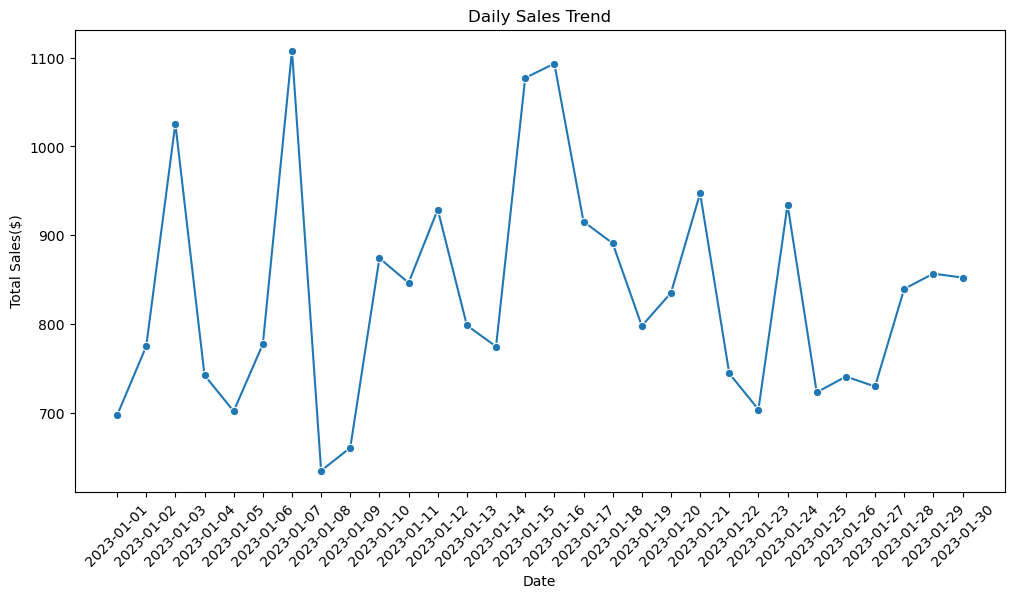

In [18]:
df_daily = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='date', y='daily_sales', marker='o')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales($)')
plt.xlabel('Date')
plt.show()

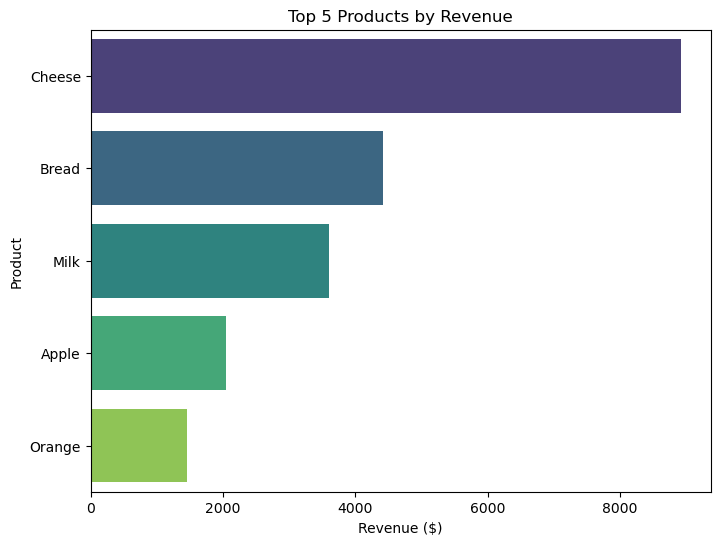

In [19]:
# Query top products
query = """
SELECT product_name, SUM(total_sales) as revenue
FROM sales
GROUP BY product_name
ORDER BY revenue DESC
LIMIT 5;
"""

df_top_products = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=df_top_products, x='revenue', y='product_name', palette='viridis')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Product')
plt.show()

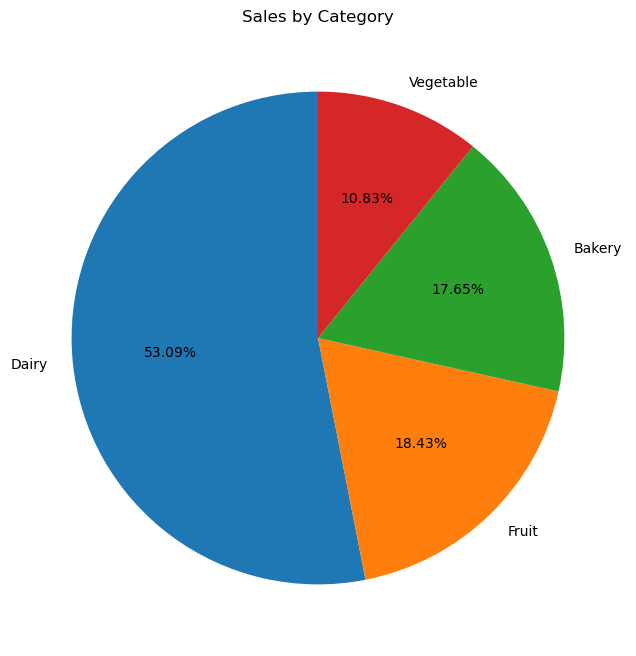

In [20]:
# Query category-wise sales
query = """
SELECT category, SUM(total_sales) as category_sales
FROM sales
GROUP BY category
ORDER BY category_sales DESC;
"""

df_category = pd.read_sql_query(query, conn)

# Plot
plt.figure(figsize=(8,8))
plt.pie(df_category['category_sales'], labels=df_category['category'], autopct='%2.2f%%', startangle=90)
plt.title('Sales by Category')
plt.show()

## Export analysis results to new CSV files

In [21]:
# Save daily sales
df_daily.to_csv('daily_sales_summary.csv', index=False)

# Save top products
df_top_products.to_csv('top_products_summary.csv', index=False)

# Save category sales
df_category.to_csv('category_sales_summary.csv', index=False)

## Close the connection :

In [22]:
conn.close()

# FINAL PROJECT SUMMARY :

| Step  | Task                          | Output                    |
| ----- | ----------------------------- | ------------------------- |
| 1–4   | Create/load, clean, and store | Data in SQLite DB         |
| 5     | Query and analyze             | Printed SQL query results |
| 6     | Visualize                     | Line, bar, pie charts     |
| 7     | Export                        | 3 CSV summary files       |
| 8     | Close DB connection           | Cleanup                   |
